In [ ]:
'''该程序段用于测试数据读取函数'''
from readdata import BearingDataReader
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.fft import fft
rder=BearingDataReader(location='Fan',ratio=0.25)
clf=LogisticRegression(n_jobs=4,multi_class='auto',max_iter=10000,solver='lbfgs')
x_train=abs(fft(rder.X_train))[:,:int(rder.X_train.shape[1]/2)]
x_test=abs(fft(rder.X_test))[:,:int(rder.X_test.shape[1]/2)]
# x_train=PCA(n_components=10).fit_transform(x_train)
# x_test=PCA(n_components=10).fit_transform(x_test)
clf.fit(x_train,rder.y_train)
result=clf.score(x_test,rder.y_test)
print(result)

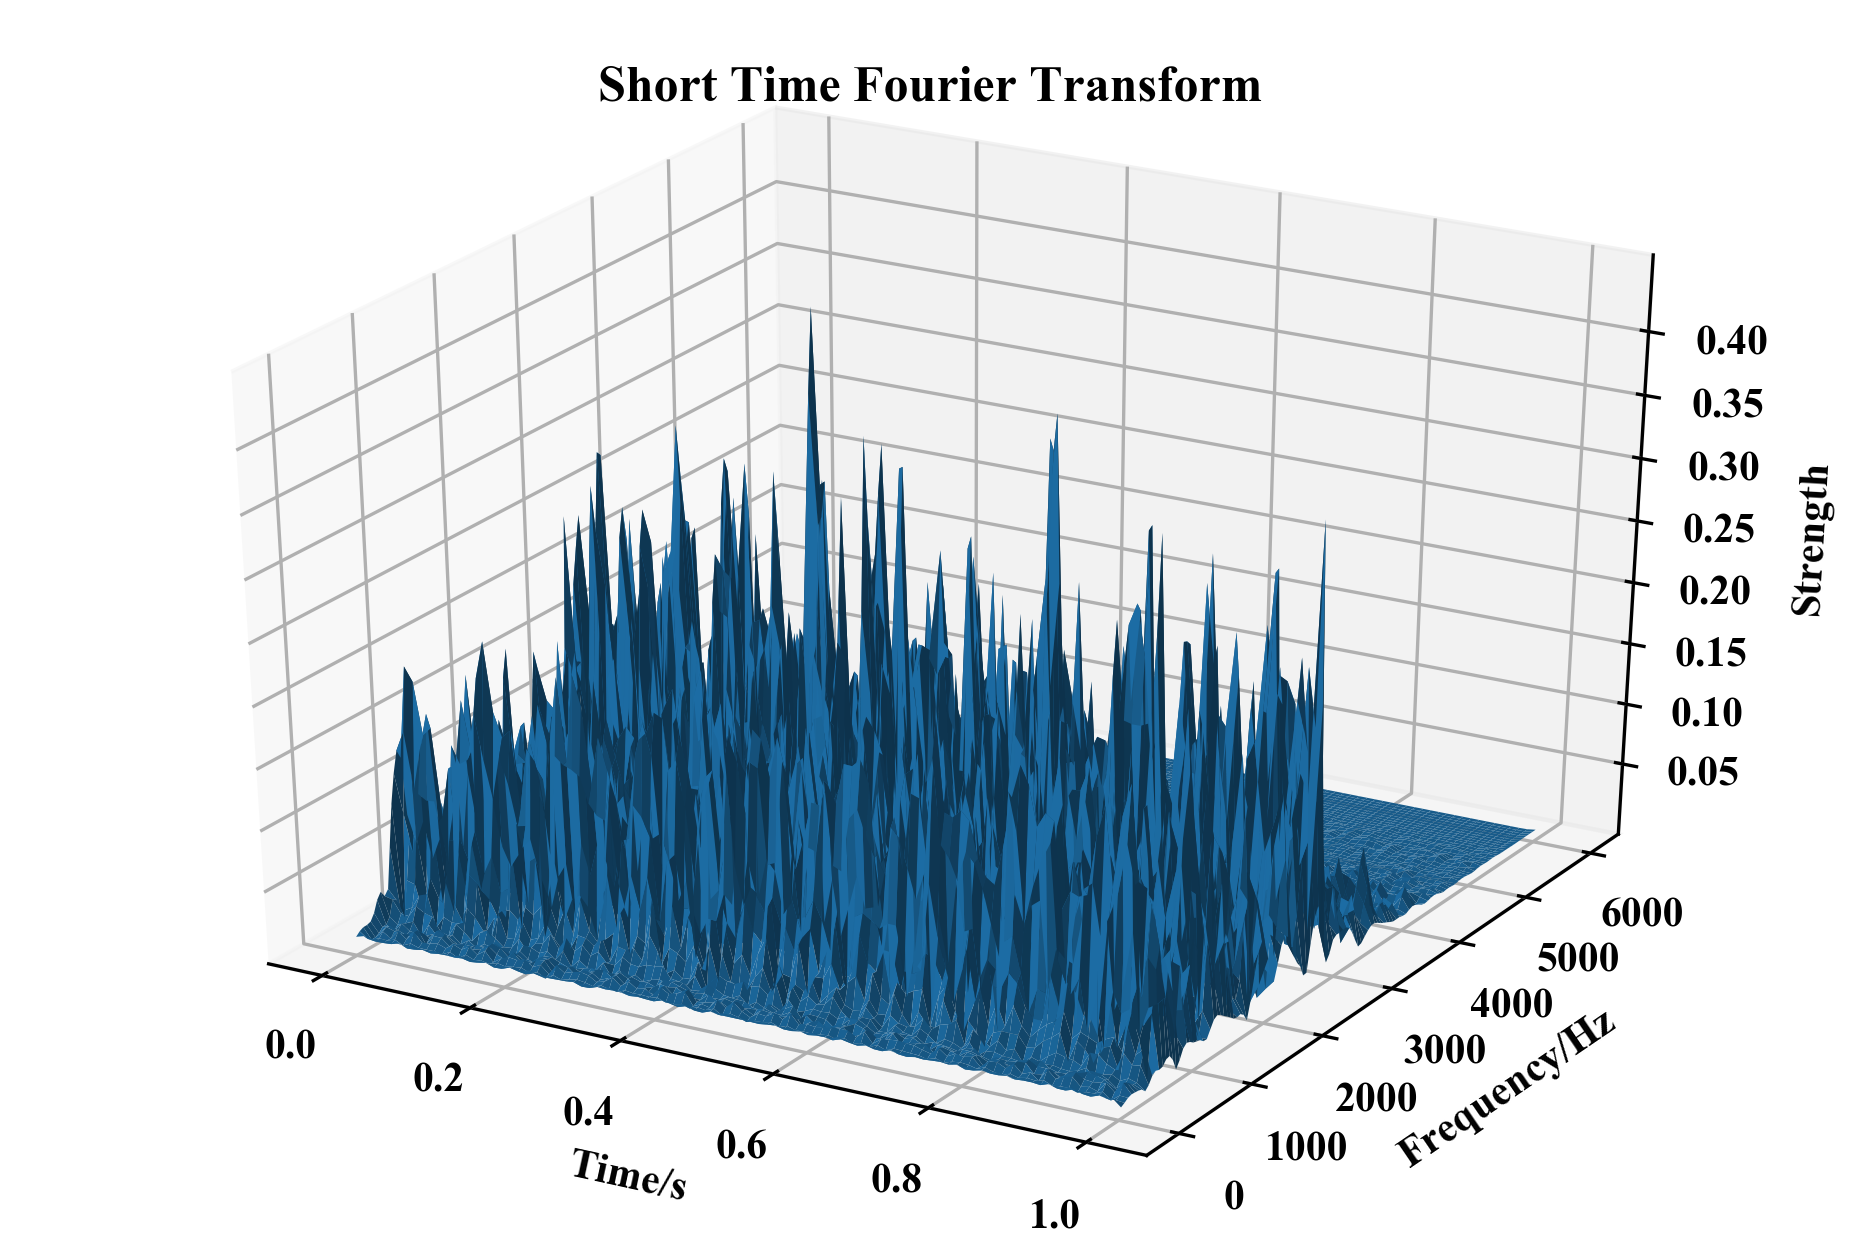

In [78]:
'''该段代码用于计算短时傅里叶变换并绘制其简单图像'''
from likefunctions_boston import plotlikeconfig
from scipy.signal import stft
from readdata import BearingDataReader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.fft import fft
from mpl_toolkits.mplot3d import Axes3D
rder=BearingDataReader(length=12000,ratio=0.25)
f,t,z=stft(rder.X_train[0],fs=12000)
tt,ff=np.meshgrid(t,f)
fig=plt.figure(dpi=300)
ax=Axes3D(fig)
ax.plot_surface(tt,ff,abs(z),rstride=1,cstride=1)
ax.set_xlabel('Time/s')
ax.set_ylabel('Frequency/Hz')
ax.set_zlabel('Strength')
ax.set_title('Short Time Fourier Transform')
plt.show()

In [1]:
'''该部分以登高线图形式给出了时频域分布'''
from likefunctions_boston import plotlikeconfig
from scipy.signal import stft
from readdata import BearingDataReader
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from numpy.fft import fft
from mpl_toolkits.mplot3d import Axes3D
# plotlikeconfig(title='Short Time Fourier Transform',xlabel='Time/s',ylabel='Frequency/Hz')
rder=BearingDataReader(length=12000,ratio=0.25)
f,t,z=stft(rder.X_train[2:4],fs=12000)
print('over')
# plt.contourf(t,f,abs(z))
# plt.plot()

KeyboardInterrupt: 

In [5]:
'''该部分用于实行小波分解并绘图'''
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft,fftfreq
import numpy as np
from likefunctions_boston import plotlikeconfig
from readdata import BearingDataReader
rder=BearingDataReader(length=1200,ratio=0.25)
coeffes=pywt.dwt(rder.X_train,wavelet='haar',axis=1)signal=pywt.idwt(cA=coeffes[0],cD=None,wavelet='haar',)
fft_signal=fft(signal)
fft_frequent=fftfreq(fft_signal.size,1/12000)
# plt.plot(fft_frequent[:int(fft_signal.size/2)],abs(fft_signal[:int(fft_signal.size/2)]))
# plt.show()
# f,t,z=stft(signal,fs=12000)
f,t,z=stft(rder.X_train[0],fs=12000)
plotlikeconfig(title='Short Time Fourier Transform',xlabel='Time/s',ylabel='Frequency/Hz')
ax=plt.gca()
fig=plt.gcf()
CS=ax.contour(t,f,abs(z))
fig.colorbar(CS)
plt.plot()


KeyboardInterrupt: 

In [ ]:
'''开始正式调参'''
from sklearn.linear_model import LogisticRegression
from bearclass import BearingParam
method='logistic_regression'
# dataset=['fft','stft','wavelet']
dataset=['fft']
param={}
# param['solver']=['saga','sag','lbfgs','newton-cg']
param['solver']=['lbfgs']
param['C']=range(1,3)
model=LogisticRegression(class_weight='balanced',random_state=42,max_iter=100000,multi_class='multinomial')
clf={}
for idx,set in enumerate(dataset):
    clf[idx]=BearingParam(model=model,dataset=set,paramset=param,cv=3)
    clf[idx].export(set+method)   
